<a href="https://colab.research.google.com/github/Voland24/MachineLearning-with-PyTorch-and-scikit-learn/blob/main/Chapter_1_Artificial_Neurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple ML classifiers

This notebook will cover perceptrons and adaptive linear neurons, two of the simpler classification algorithms.
They will be used to classify the Iris dataset.

Pecpetrons are also called MCP for MClough Pitts Perceptrons. It tries to mimic the function of the humnan neuron and it's seemingly binary and linear decision boundary, it either fires or it doesn't if the inputs are above a certain threshold value.

The general idea here is to utilize a so called decision function i.e. an activation function that either fires or not based on the inputs the neuron recevies. The neuron does simple calculations, it performs a linear combination of the input values and the weights associated with the neruon and that output is the input into the decision function.

If the output of the decision function is greater than some theta, then it outputs 1, else it outputs 0.

This theta term can be put into the neuron itself as its bias term so the decision is if the output is greater than 0 it outputs 1, else its 0.



Here we can closely observe how the algorithms works

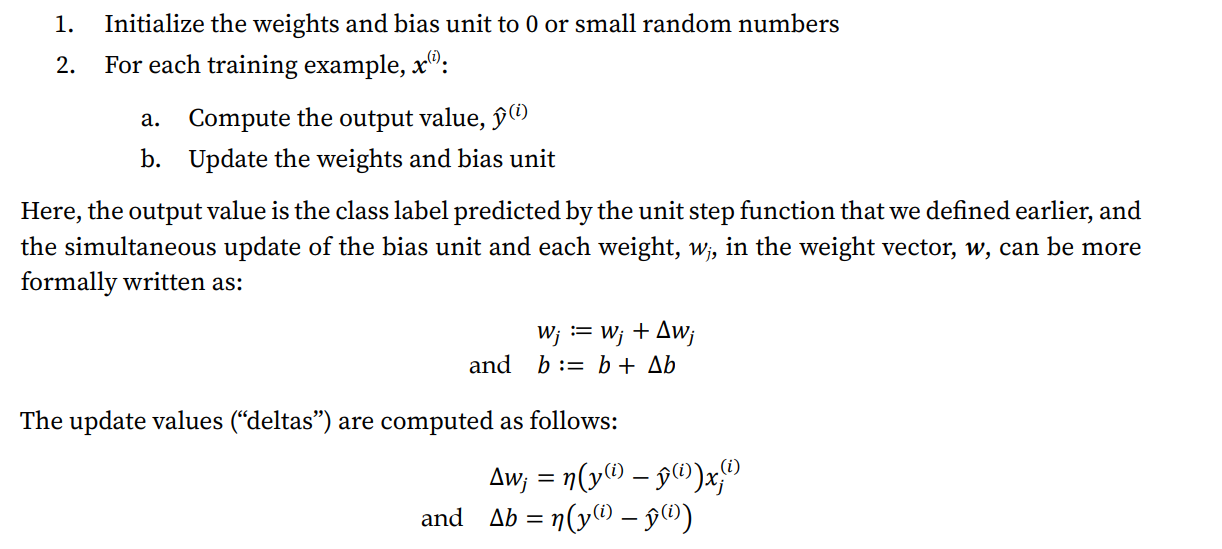



the term in the update rule is called learning rate and it's usually between 0.0 and 1.0, y(i) and yhat(i) are the ground truth and the model's prediction

Important to note that the perceptron only works if the classes are linearly separable that is if there is a linear decision boundary that can be used to separate the classes. If there isn't such a boundary, we would have to use a limited number of epochs for training the model or tell the model the acceptable number of missclassifications, otherwise the model would never stop updating.

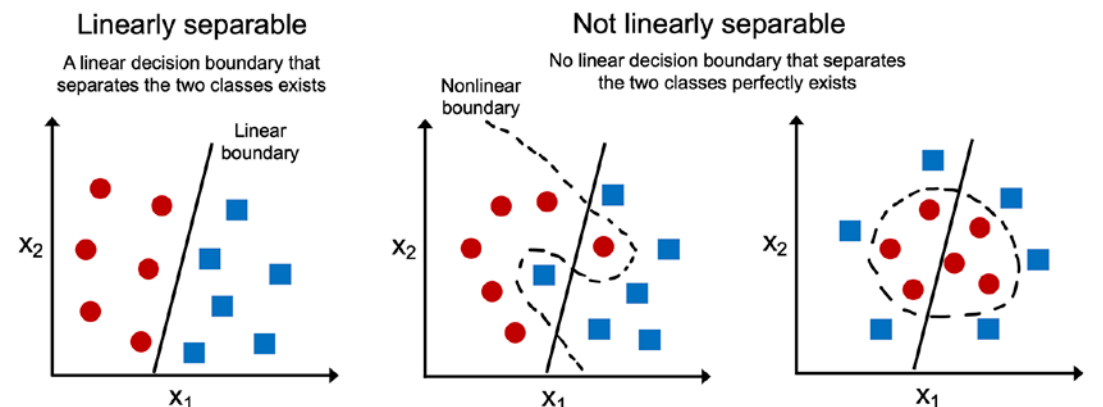

The perceptron here will be implemented as an object oriented api 

In [16]:
import numpy as np

class Perceptron:
  def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
    self.eta = eta #learning rate
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, X, y):
    #shape of X is [n_examples, n_features]
    #y shape is [n_examples]
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
    self.b_ = np.float_(0.)
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self
  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_
  def predict(self,X):
    return np.where(self.net_input(X) >= 0.0,1,0)


The bias is initially set to 0 in the fit method and the weights vector is set to values chosen from a normal distribution of stand dev of 0.01

The weights could have been init to 0, but then the learning_rate would have no effect on the decision boundary. It would only effect the scale of the weight vector, not its direction. 
The for loop loops over all the training examples and updates the weights and biases via its learning rule.
The predict method outputs a class for the given input and it's used in training as well as inference on new data points in the future.

We will use the perceptron to classify the Iris dataset and only 2 out of 3 classes in it, setosa and versicolor. We do this becasuse the perceptron is a binary classifier. It can be extended, as all binary classifiers to be multi class with OvA technique. We train a classifier per class and choose the one with the highest confidence.

In [4]:
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header = None, encoding = 'utf-8')
df.head()



,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We now fetch the first 100 examples, 50 versicolor and 50 setosa and assign numerical values to class labels, 1 versicolor and 0 setosa. We assign these values to a y vector, for these are our targets.
Also, we fetch the 1. and 3. column or features from the table and assign them to a matrix X, these are our features.

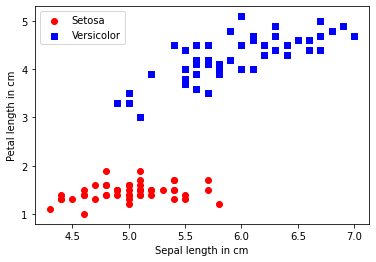

In [5]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values #get the index 4 column values 
y = np.where(y == 'Iris-setosa', 0, 1) #assign 0 where setosa, else 1
X = df.iloc[0:100, [0,2]].values #get first and third column values
plt.scatter(X[:50,0], X[:50,1], color = 'red', marker = 'o', label ='Setosa') #first 50 examples are setosa
plt.scatter(X[50:100,0], X[50:100,1], color = 'blue', marker = 's', label ='Versicolor') #next 50 are  versicolor
plt.xlabel('Sepal length in cm')
plt.ylabel('Petal length in cm')
plt.legend(loc = 'upper left')
plt.show()


We can see that for these two given classes and these two given features to describe them, a linear boundary is sufficient to separate them completely and a MCP will suffice.

In [13]:
print(y[51:100])


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


Let's train the perceptron

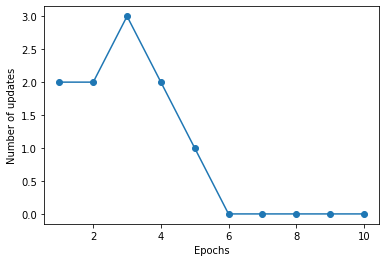

In [17]:
ppn = Perceptron(eta = 0.1,  n_iter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

We can see that after 6 epochs the number of updates converges to zero, meaning the perceptron makes no further mistakes. The number of updates is the same as the number of errors or misclassifications as the learning rule updates only in case of mistakes.

This is a function to draw the decision boundary of any classifier, as a helper method.

In [14]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y, classifier, resolution = 0.02):
  markers = ('o','s', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
  x2_min, x2_max = X[:,1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1,xx2,lab,alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx], label = f'Class {cl}', edgecolor = 'black')
  

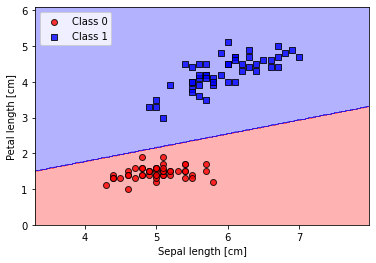

In [18]:
plot_decision_regions(X, y, classifier = ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()


We can see that the perceptron has found a linear decision boundary and has perfectly separated the different classes of Irises.

The problem of convergence is a problem in the perceptron. It can only learn linearly separable decision boundaries. If the classes in question cannot be linearly separated, the algorithm will never converge and will keep updating forever, unless a max number of iterations is set.

# Adaptive linear neurons and the convergence of learning

Adaline or ADaptive LInear NEuron, is also a type of single layer neural network. It was a phd work published soon after the paper of the perceptron algorithm, as is considered an improvement of the work.

This paper laid foundation a key conpect in ML and DL and that is minimizing continious loss functions. This is used in various ml classification and regression algorithms, and deep neural networks.

The main difference in Adaline is that the weights are updated based on a linear activation rule rather than a unit step function like the perceptron. In Adaline the activation function is simply the identity function i.e. f(x) = x.

This linear activation function is used to learn the weights, however we still use a threshold function to make the prediction for the given example.

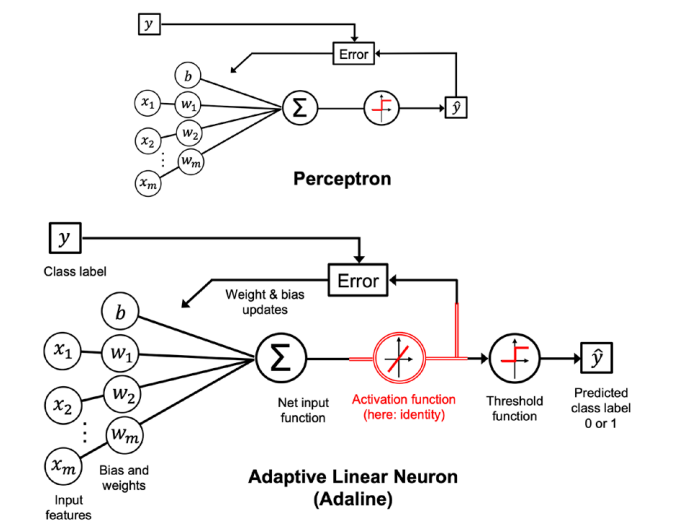

As we can see. Adaline compares the true class label and the activation function's continious valued output and uses the computed error to update the weights. Perceptron on the other hand, compared true class labels with the predicted class labels.

One of the most important concepts in supervised machine learning is the so called objective function, also called the cost or the loss function. This is the function we aim to minimize and in the case of Adaline this is the MSE or Mean Squared error between the true class label and the predicted output of the model.

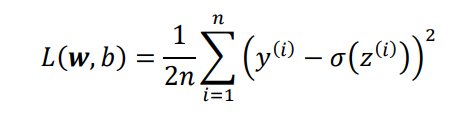

1/2 is there to make stuff easier when we later do the derivative. y(i) is the true class label, sigma(y(i)) is a real number, not an integer class label. z(i) is the weight(i) * x(i) + b(i). while sigma is the activation function.

Why use an activation function? Well, now the loss function is differentiable and also convex, meaning we can use these to facts to implement Gradient Descent, an optimization algorithm used for minimizing functions via its parameters.

Simply put, since the function is convex, we seek its minimum by "climbing down". We do this by finding the gradient and going in the opposite direction. Step size is determined by the gradient i.e. slope, how steep the function is in that point and also the aforementioned learning rate

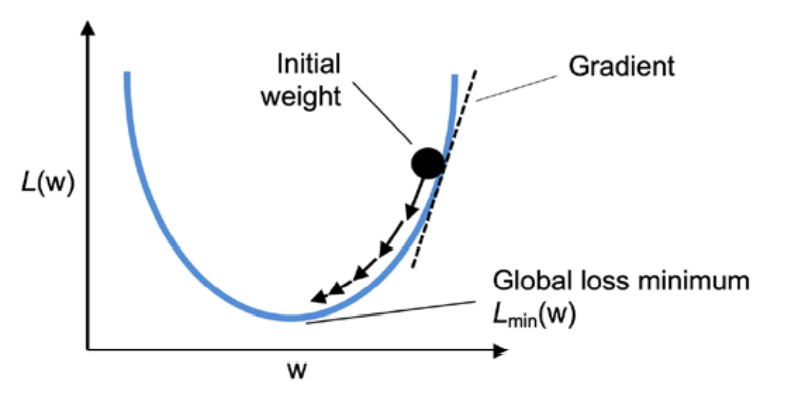

The idea here is to find the partial derivatives of the loss function with respect to each of the weights and the bias term and update the weights and bias accordingly.

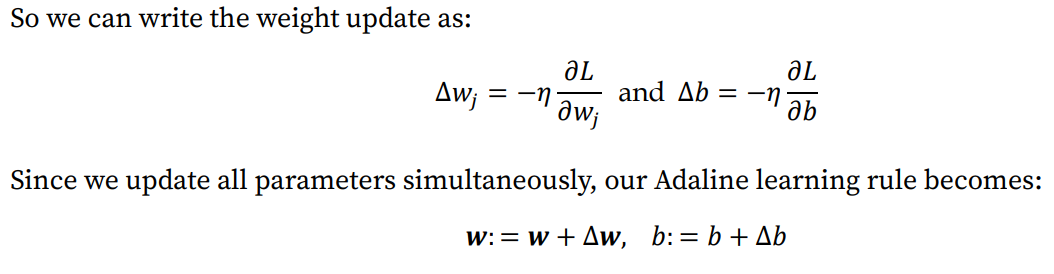

The derivatives are done in the following manner

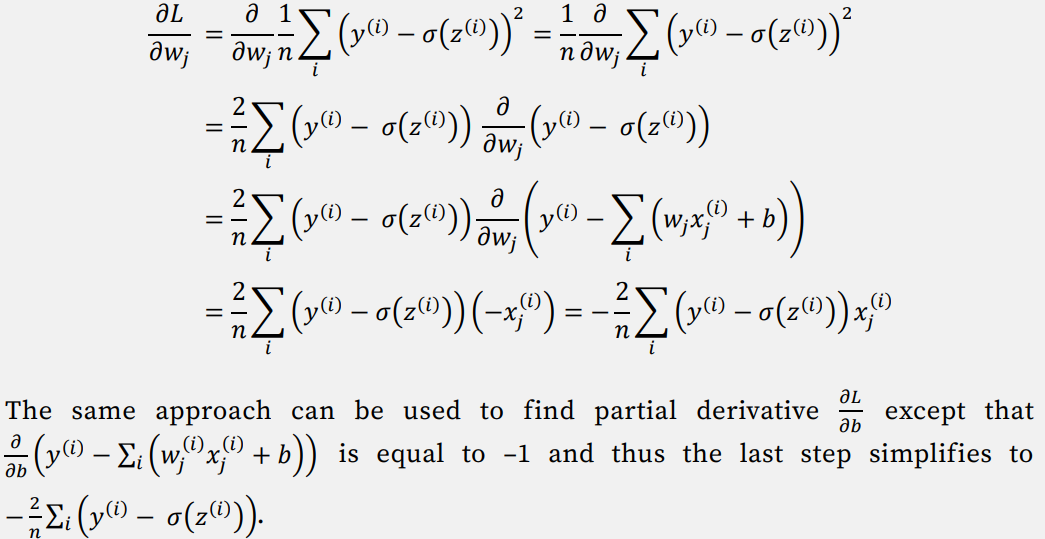

Apart from the diiference that the predicted value is continious and NOT a class label, there is one more difference. The weights and biases are updated once according to the whole dataset and NOT after every example, like the perceptron. This is called batch gradient descent and more precisely, full batch gradient descent since the batch here is the whole dataset.

In [21]:
class AdalineGD:
  #eta is the learning rate, between 0.0 and 1.0
  #n_iter is the no of iterations of the algorithm
  #w_ and b_ are the weights and bias term after fitting
  #losses_ is the mean squared loss error values after each epoch

  def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, X, y):
    #X is an array, [n_examples, n_features], feature matrix
    #y is an array, [n_examples], targets or labels
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1]) #weight per feature
    self.b_ = np.float_(0.) #one bias term
    self.losses_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0] #update rule, X.shape[0] is n, number of examples
      self.b_ += self.eta * 2.0 * errors.mean()
      loss = (errors**2).mean()
      self.losses_.append(loss)
    return self
  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_
  def activation(self, X):
    return X
  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.5,1,0)
    

Here we can note that we update the weights and bias once per iteration based on the whole dataset and we calucalte the derivatives via vectorized form. We derived the derivatives analitically and we apply that to the whole dataset at once per iteration.

We will choose two different learning rates, 0.1 and 0.0001 to see how they perform. Both the learning rate and the number of iterations are called hyperparameters and they have to be found in the process of tuning the algorithm. There will be a notebook dedicated to the methods to find these.

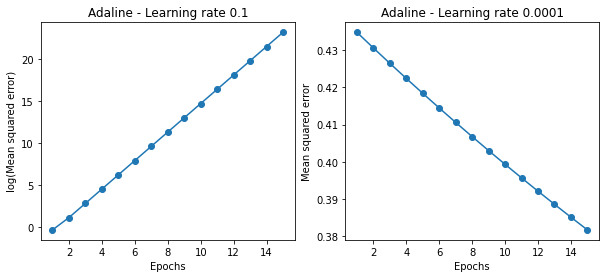

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')
ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

There are two different problems at play here. On the left hand graph, we can see that the learning rate of 0.1 is too large, causing the algorithm to overshoot the minimum and diverge, thus increasing the error over time.
On the other hand, we can see that the learning rate of 0.0001 is causing the error to go down and converge to its minimum, however it does this rather slowly and will need a lot of iterations to get there.

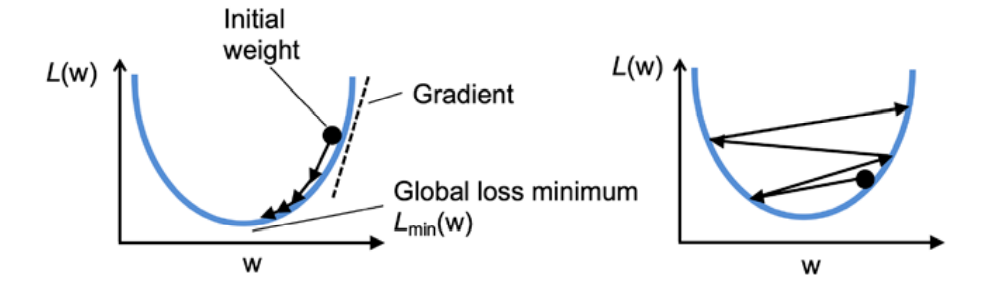

We can see how a well chosen learning rate behaves versus how too big of a value for the learning rate will cause the algorithm to diverge from the minimum of the function.



# Feature scaling

It's good practice to scale the features down to simillar or the same scale. Why? It helps gradient descent to learn to converge more quickly. It does this by forcing each feature to have it's mean at 0 and a standard deviation of 1.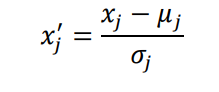

xj is a vector that consists of the jth feature values of all examples n, just scaled to have its mean at 0 and stand div at 1. We do this to all the features. This process is called standardization of features.

This will cause the algorithm to converge more quickly as well as help to find the best learning rate for all features at the same time. Meaning if we had features that were on vastly different scales, this can cause the algorithm to find the weights for one feature rather well but perform poorly on a different one. This will also cause the algorithm to take fewer steps to converge.

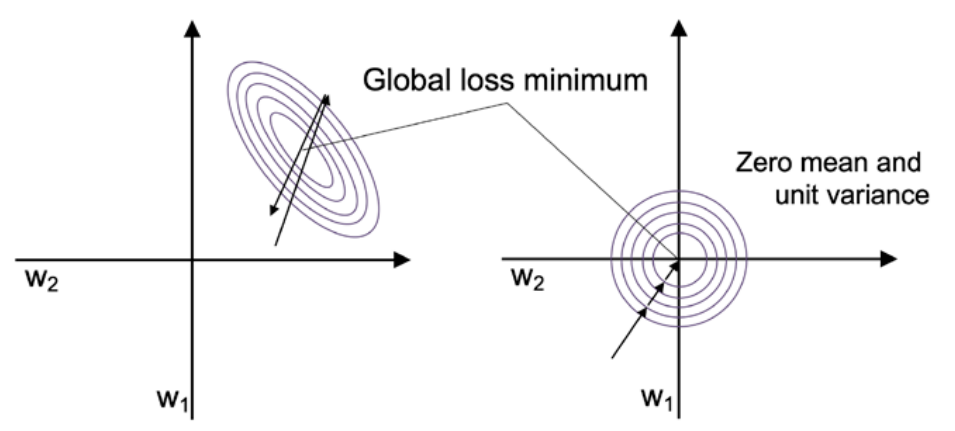

In [23]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:, 0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:, 1].std()

ada_gd = AdalineGD(n_iter = 20, eta = 0.5)
ada_gd.fit(X_std, y)

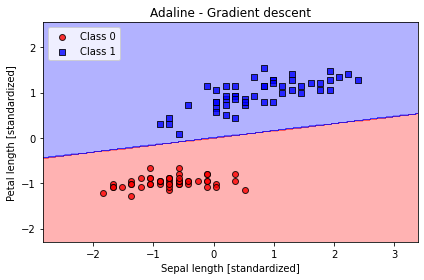

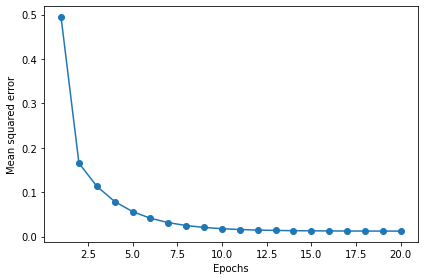

In [24]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.losses_) + 1),ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()

We can see that Adaline converged on the standardized features and has found a decision boundary. However the error doesn't go to 0 like the perceptron, it approaches 0 and is still a non negative value.

# Large scale ML and Stochastic gradient descent

Usually, ML apps will have millions of examples to train on. Running full batch GD, although accurate will result in a long execution time and thus greatly slow down the training process. This happens because we are evaluating the update values after caluclating them on the whole dataset.

An alternitve to this is called Stochastic GD. Here we update the weights and biases after each example we go through.

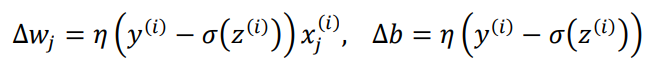

Although this is just an approximation of GD, this will converge mucch faster that regular GD. Also, the error surface (if we have more than two features) will be noisier which can help the function escape local minima and converge to the best one in the case we are working with non-linear loss functions.

We also want to feed the data into the network in a random order in order to prevent cycles from happening. We want to shuffle the dataset before each epoch to help the learning process.

A common thing to use when performing SGD is an adaptive learning rate  that changes over the iterations or epochs. It decreases as we approach the minimum so as to not overshoot and yet it moves faster in the begining whe nwe are further away from the minimum. c1 and c2 terms are constants and are hyperparmeters. SGD doesn't find the exact global minimum but an area very close to it, which is sufficiently good.

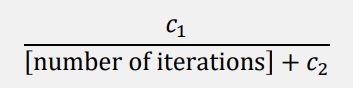

SGD is also used in online learning. Here the model is trained as the new data arrives, on the fly. This is the case in web based apps, when we gather user data. After training on it, the example can be discarded to perserve storage space.

** Mini batch gradient descent ** is a middle ground between FBGD and SGD. Here we apply full batch GD but to smaller batches of the datsets, commonly 32 examples per batch. The edge over full batch GD is that we converge faster due to more frequent updates. It also has an edge over SGD because we can use vectorized operations to update the weights after each mini batch instead of once after each example, thus replacing the for loop.

In order to make Adaline SGD we have to update the weights once after each example. We will implenet a partial fit method to be used in online learing, as it will not reinit the weights, just update them.
We will also add the option to shuffle the dataset to prevent cycle in the learning process.
The convergence will be checked by tracking the average loss after each epoch.

In [27]:
class AdalineSGD:
  #shuffle, bool, shuffle the data after each epoch if True
  #losses_ is an array of the average loss in each epoch
  def __init__(self, eta = 0.01, n_iter = 10, shuffle = True, random_state = None):
    self.eta = eta
    self.n_iter = n_iter
    self.w_initialized = False
    self.shuffle = shuffle
    self.random_state = random_state
  def fit(self, X, y):
    self._initialize_weights(X.shape[1]) #one weight per feature
    self.losses_ = []
    for i in range(self.n_iter):
      if self.shuffle:
        X, y = self._shuffle(X, y)
      losses = []
      for xi, target in zip(X, y):
        losses.append(self._update_weights(xi, target)) #updates are done once per example, for each X(i) and y(i)
      avg_loss = np.mean(losses)
      self.losses_.append(avg_loss)
    return self
  def partial_fit(self, X, y):
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])
    if y.ravel().shape[0] > 1: #if there are more than one example at this time
      for xi, target in zip(X, y):
        self._update_weights(xi, target)
    else:
      self._update_weights(X,y) #only one example came
    return self
  def _shuffle(self, X, y):
    r = self.rgen.permutation(len(y))  #this is an array of 0 - 100 numbers in random order, and are used to index X and y arrays and thus permute them
    return X[r], y[r]
  def _initialize_weights(self, m):
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01, size = m)
    self.b_ = np.float_(0.)
    self.w_initialized = True
  def _update_weights(self, xi, target):
    output = self.activation(self.net_input(xi)) #only one example is passed ot the time
    error = (target - output)
    self.w_ += self.eta * 2.0 * xi * (error)
    self.b_ += self.eta * 2.0 * error
    loss = error **2 #it is going to be averaged later, once per epoch
    return loss
  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_
  def activation(self,X):
    return X
  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


We can now train SGD Adaline 

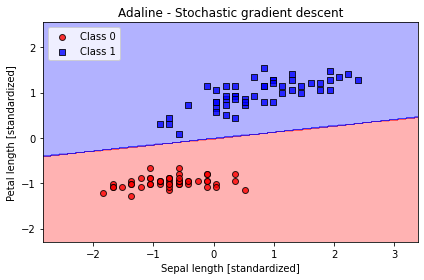

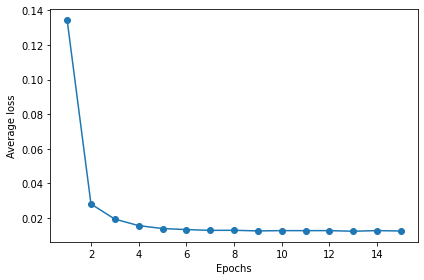

In [28]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()